In [181]:
import pandas as pd
import numpy as np
import warnings
from Dataset_functions import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress all warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [91]:
premier_league_data = pd.read_csv('premier_league_data.csv')

In [93]:
championship_data = pd.read_csv('championship_data.csv')

In [215]:
england_data = pd.concat([premier_league_data, championship_data])

In [217]:
england_data.fillna(0, inplace = True)

In [219]:
england_data.sort_values(['Date'], ascending = True, inplace = True)

In [221]:
england_data.drop(['Date', 'Home xG', 'Away xG', 'Time'], axis = 1, inplace= True,errors = 'ignore')

In [223]:
england_data = pd.get_dummies(england_data, columns=['Div'])

In [105]:
england_data.corr()['home_win_odds'].sort_values(ascending = False).head(10)

home_win_odds                               1.000000
total_goals_per_game_home_team              0.483015
total_xg_per_game_home_team                 0.458558
total_shots_on_target_per_game_home_team    0.438858
total_goals_per_game_home                   0.400866
10_form_goals_scored_home_team              0.392411
10_form_home_team                           0.391450
total_shots_per_game_home_team              0.389817
5_form_xg_home_team                         0.380833
5_form_goals_scored_home_team               0.379489
Name: home_win_odds, dtype: float64

In [106]:
england_data.corr()['home_win_odds'].sort_values(ascending = False).tail(10)

total_shots_per_game_away_team             -0.336866
10_form_goals_scored_away_team             -0.337267
total_xg_against_per_game_home_team        -0.340693
5_form_away_team                           -0.358665
10_form_away_team                          -0.374066
total_shots_on_target_per_game_away_team   -0.378660
total_xg_per_game_away_team                -0.405708
total_goals_per_game_away_team             -0.423674
draw_odds                                  -0.457363
away_win_odds                              -0.964044
Name: home_win_odds, dtype: float64

In [108]:
england_data.corr()['draw_odds'].sort_values(ascending = False).head(10)

draw_odds                                 1.000000
Div_E1                                    0.382872
away_win_odds                             0.204600
total_shots_against_per_game_home_team    0.164448
total_xg_against_per_game_home_team       0.143988
total_shots_against_per_game_home         0.133955
5_form_shots_against_home_team            0.132833
10_form_shots_home_team                   0.132833
total_goals_against_per_game_home_team    0.124529
total_xg_against_per_game_home            0.120769
Name: draw_odds, dtype: float64

In [109]:
england_data.corr()['draw_odds'].sort_values(ascending = False).tail(10)

5_form_goals_scored_home_team              -0.359598
total_shots_per_game_home_team             -0.363291
10_form_goals_scored_home_team             -0.373672
Div_E0                                     -0.382872
total_goals_per_game_home                  -0.400337
HomeTeam_Man City                          -0.407575
total_xg_per_game_home_team                -0.417923
total_shots_on_target_per_game_home_team   -0.425042
total_goals_per_game_home_team             -0.456286
home_win_odds                              -0.457363
Name: draw_odds, dtype: float64

In [111]:
england_data.corr()['away_win_odds'].sort_values(ascending = False).head(10)

away_win_odds                               1.000000
total_goals_per_game_away_team              0.500446
total_xg_per_game_away_team                 0.475018
total_shots_on_target_per_game_away_team    0.451390
10_form_away_team                           0.409086
10_form_goals_scored_away_team              0.398570
total_shots_per_game_away_team              0.396297
total_goals_per_game_away                   0.394538
5_form_away_team                            0.391372
5_form_goals_scored_away_team               0.386677
Name: away_win_odds, dtype: float64

In [115]:
england_data.corr()['away_win_odds'].sort_values(ascending = False).tail(10)

total_shots_on_target_against_per_game_away_team   -0.331272
5_form_home_team                                   -0.334633
total_shots_against_per_game_away_team             -0.341868
10_form_home_team                                  -0.345446
total_goals_against_per_game_away_team             -0.350239
total_shots_on_target_per_game_home_team           -0.356044
total_xg_against_per_game_away_team                -0.356178
total_xg_per_game_home_team                        -0.379856
total_goals_per_game_home_team                     -0.395312
home_win_odds                                      -0.964044
Name: away_win_odds, dtype: float64

In [117]:
summary = england_data.describe(include='all').T

# Add missing value count
summary['Missing Values'] = england_data.isnull().sum()

# Add mode for each column
summary['Mode'] = england_data.mode().iloc[0]

# Display the summary table
summary = summary[['count', 'mean', '50%', 'std', 'min', '25%', '50%', '75%', 'max', 'Missing Values', 'Mode']]
summary.columns = ['Count', 'Mean', 'Median', 'Std. Dev', 'Min', 'Q1', 'Q2', 'Q3', 'Max', 'Missing Values', 'Mode']


In [197]:
summary

,Count,Mean,Median,Std. Dev,Min,Q1,Q2,Q3,Max,Missing Values,Mode
FTHG,6050.0,1.471074,1.0,1.266938,0.0,1.0,1.0,2.0,9.0,0,1.0
FTAG,6050.0,1.202149,1.0,1.141774,0.0,0.0,1.0,2.0,9.0,0,1.0
HomeTeam_Arsenal,6050.0,0.022314,0.0,0.147715,0.0,0.0,0.0,0.0,1.0,0,0.0
HomeTeam_Bournemouth,6050.0,0.023471,0.0,0.151407,0.0,0.0,0.0,0.0,1.0,0,0.0
HomeTeam_Brighton,6050.0,0.022149,0.0,0.147179,0.0,0.0,0.0,0.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
HomeTeam_Portsmouth,6050.0,0.000331,0.0,0.01818,0.0,0.0,0.0,0.0,1.0,0,0.0
AwayTeam_Oxford,6050.0,0.000331,0.0,0.01818,0.0,0.0,0.0,0.0,1.0,0,0.0
AwayTeam_Portsmouth,6050.0,0.000331,0.0,0.01818,0.0,0.0,0.0,0.0,1.0,0,0.0
Div_E0,6050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False


In [225]:
england_data2 = england_data.copy()
england_data2.drop(['total_points_home_team', 'total_points_away_team', 'matchday',
                    'total_goals_home_team','total_goals_against','total_points','total_goals_against_home_team',
                   'total_goals_against_away_team', 'total_shots_on_target_per_game_home_team', 'total_shots_against_per_game_away_team',
                   'total_shots_per_game_home','total_goals_away_team','total_shots_on_target_per_game_away_team', '10_form_shots', '10_form_shots_away_team',
                    '10_form_shots_against_home_team','10_form_shots_against_away_team', '10_form_shots_on_target_against_away_team','10_form_shots_home_team',
                    '10_form_shots_against','10_form_shots_on_target_home_team','10_form_shots_on_target_against', '10_form_xg_against_away_team', 
                    '10_form_shots_on_target_against_home_team', '10_form_shots_on_target', 'total_points_away', 'total_points_home', '10_form_shots_away',
                    '10_form_shots_home','total_shots_on_target_against_per_game_away','10_form_goals_scored_home', '10_form_shots_against_home',
                    '10_form_shots_on_target_home', '10_form_shots_on_target_away','10_form_shots_on_target_away_team','10_form_xg_home_team',
                    '10_form_shots_against_away', '10_form_shots_on_target_against_home','total_shots_on_target_per_game_away', 
                    '5_form_shots_on_target_home','10_form_shots_on_target_against_away'
                   ],inplace = True, axis = 1, errors = 'ignore')
corr_matrix = england_data2.corr()

# Find pairs of variables with correlation > 0.9
high_corr_pairs = []

# Iterate over the matrix to find pairs with correlation > 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

In [ ]:
numeric_columns = england_data.select_dtypes(include=['float64', 'int64']).columns
for i in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(england_data[i].dropna())
    plt.title(f'Box Plot of {i}')
    plt.ylabel(i)
    plt.show()

In [ ]:
# We now have 2 dataframes, england, with all primary variables and england2 with removeer variables that had high collinearity

In [227]:
targets = england_data[['FTHG', 'FTAG','home_win_odds', 'draw_odds', 'away_win_odds']]
targets2 = england_data2[['FTHG', 'FTAG','home_win_odds', 'draw_odds', 'away_win_odds']]

In [229]:
england_data.drop(['FTHG', 'FTAG','home_win_odds', 'draw_odds', 'away_win_odds'], inplace= True, axis = 1)
england_data2.drop(['FTHG', 'FTAG','home_win_odds', 'draw_odds', 'away_win_odds'], inplace= True, axis = 1)

In [231]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_minmax = MinMaxScaler()
numeric_columns = england_data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns2 = england_data2.select_dtypes(include=['float64', 'int64']).columns

england_data_n = pd.DataFrame(scaler_minmax.fit_transform(england_data[numeric_columns]), columns=numeric_columns)
england_data2_n = pd.DataFrame(scaler_minmax.fit_transform(england_data2[numeric_columns2]), columns=numeric_columns2)


england_data[numeric_columns] = england_data_n
england_data2[numeric_columns2] = england_data2_n

In [247]:
from sklearn.decomposition import PCA

pca_all = PCA(n_components=None)
pca_50 = PCA(n_components=50)
pca_100 = PCA(n_components=100)

pca_all_2 = PCA(n_components=None)
pca_50_2 = PCA(n_components=50)
pca_100_2 = PCA(n_components=100)

def create_pca(pca, data):
    pca_result = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.legend(loc='best')
    plt.show()

    for i, var in enumerate(cumulative_variance):
        print(f"PC{i+1}: {var:.4f}")
    return pca_df


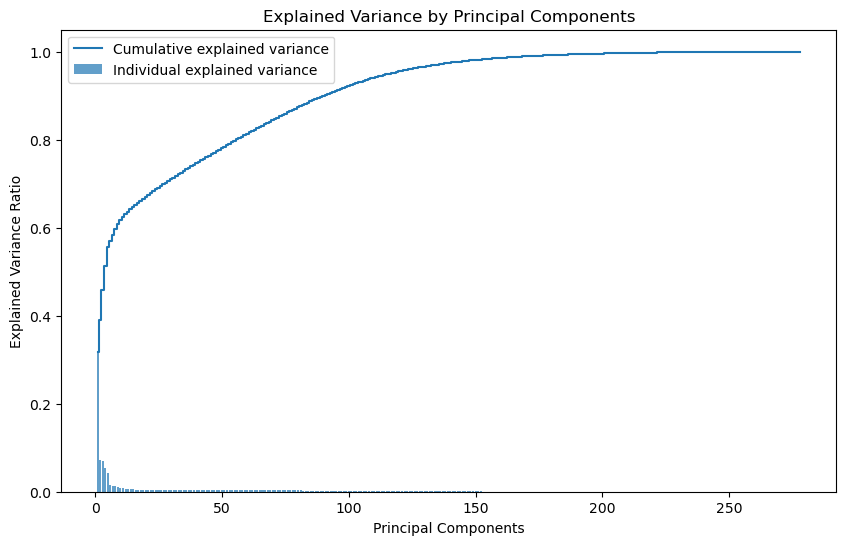

PC1: 0.3168
PC2: 0.3893
PC3: 0.4587
PC4: 0.5136
PC5: 0.5556
PC6: 0.5705
PC7: 0.5843
PC8: 0.5971
PC9: 0.6081
PC10: 0.6169
PC11: 0.6246
PC12: 0.6307
PC13: 0.6364
PC14: 0.6418
PC15: 0.6470
PC16: 0.6518
PC17: 0.6567
PC18: 0.6614
PC19: 0.6660
PC20: 0.6704
PC21: 0.6746
PC22: 0.6788
PC23: 0.6829
PC24: 0.6869
PC25: 0.6909
PC26: 0.6948
PC27: 0.6987
PC28: 0.7025
PC29: 0.7064
PC30: 0.7102
PC31: 0.7140
PC32: 0.7177
PC33: 0.7214
PC34: 0.7251
PC35: 0.7287
PC36: 0.7324
PC37: 0.7360
PC38: 0.7396
PC39: 0.7432
PC40: 0.7467
PC41: 0.7503
PC42: 0.7538
PC43: 0.7572
PC44: 0.7607
PC45: 0.7641
PC46: 0.7675
PC47: 0.7709
PC48: 0.7743
PC49: 0.7776
PC50: 0.7809
PC51: 0.7843
PC52: 0.7875
PC53: 0.7908
PC54: 0.7941
PC55: 0.7973
PC56: 0.8005
PC57: 0.8037
PC58: 0.8069
PC59: 0.8101
PC60: 0.8133
PC61: 0.8165
PC62: 0.8196
PC63: 0.8228
PC64: 0.8259
PC65: 0.8290
PC66: 0.8321
PC67: 0.8351
PC68: 0.8381
PC69: 0.8412
PC70: 0.8442
PC71: 0.8472
PC72: 0.8502
PC73: 0.8531
PC74: 0.8561
PC75: 0.8590
PC76: 0.8619
PC77: 0.8648
PC78: 0.

In [239]:
df_pca_all = create_pca(pca_all, england_data)

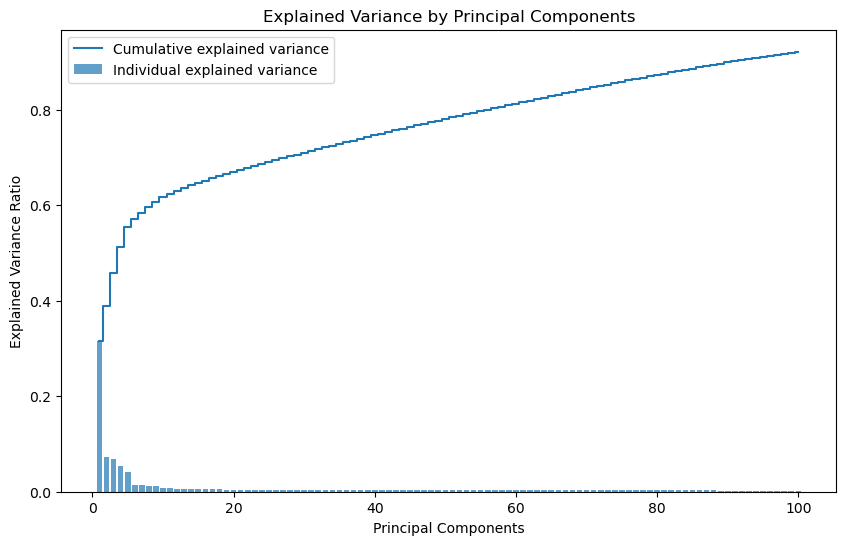

PC1: 0.3168
PC2: 0.3893
PC3: 0.4587
PC4: 0.5136
PC5: 0.5556
PC6: 0.5705
PC7: 0.5843
PC8: 0.5971
PC9: 0.6081
PC10: 0.6169
PC11: 0.6246
PC12: 0.6307
PC13: 0.6364
PC14: 0.6418
PC15: 0.6470
PC16: 0.6518
PC17: 0.6567
PC18: 0.6614
PC19: 0.6660
PC20: 0.6704
PC21: 0.6746
PC22: 0.6788
PC23: 0.6829
PC24: 0.6869
PC25: 0.6909
PC26: 0.6948
PC27: 0.6987
PC28: 0.7025
PC29: 0.7064
PC30: 0.7102
PC31: 0.7139
PC32: 0.7177
PC33: 0.7214
PC34: 0.7250
PC35: 0.7287
PC36: 0.7323
PC37: 0.7360
PC38: 0.7396
PC39: 0.7431
PC40: 0.7467
PC41: 0.7502
PC42: 0.7537
PC43: 0.7572
PC44: 0.7607
PC45: 0.7641
PC46: 0.7675
PC47: 0.7709
PC48: 0.7743
PC49: 0.7776
PC50: 0.7809
PC51: 0.7842
PC52: 0.7875
PC53: 0.7908
PC54: 0.7940
PC55: 0.7972
PC56: 0.8005
PC57: 0.8037
PC58: 0.8069
PC59: 0.8101
PC60: 0.8132
PC61: 0.8164
PC62: 0.8196
PC63: 0.8227
PC64: 0.8258
PC65: 0.8289
PC66: 0.8320
PC67: 0.8350
PC68: 0.8380
PC69: 0.8411
PC70: 0.8441
PC71: 0.8471
PC72: 0.8500
PC73: 0.8530
PC74: 0.8559
PC75: 0.8588
PC76: 0.8617
PC77: 0.8646
PC78: 0.

In [241]:
df_pca_100 = create_pca(pca_100, england_data)

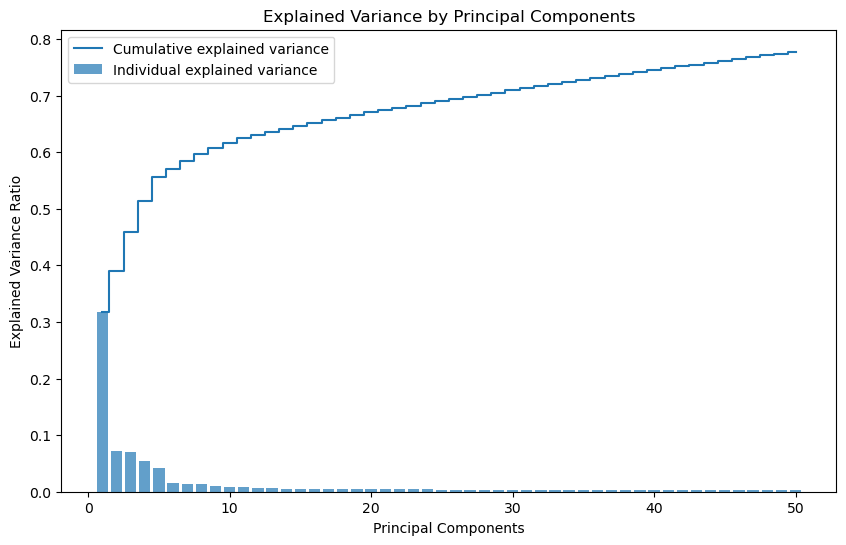

PC1: 0.3168
PC2: 0.3893
PC3: 0.4587
PC4: 0.5136
PC5: 0.5556
PC6: 0.5705
PC7: 0.5843
PC8: 0.5971
PC9: 0.6081
PC10: 0.6169
PC11: 0.6246
PC12: 0.6307
PC13: 0.6364
PC14: 0.6418
PC15: 0.6469
PC16: 0.6518
PC17: 0.6566
PC18: 0.6613
PC19: 0.6658
PC20: 0.6701
PC21: 0.6743
PC22: 0.6784
PC23: 0.6824
PC24: 0.6863
PC25: 0.6902
PC26: 0.6941
PC27: 0.6979
PC28: 0.7017
PC29: 0.7054
PC30: 0.7092
PC31: 0.7129
PC32: 0.7165
PC33: 0.7201
PC34: 0.7237
PC35: 0.7273
PC36: 0.7308
PC37: 0.7344
PC38: 0.7378
PC39: 0.7413
PC40: 0.7447
PC41: 0.7481
PC42: 0.7515
PC43: 0.7548
PC44: 0.7581
PC45: 0.7614
PC46: 0.7647
PC47: 0.7679
PC48: 0.7712
PC49: 0.7744
PC50: 0.7775


In [242]:
df_pca_50 = create_pca(pca_50, england_data)

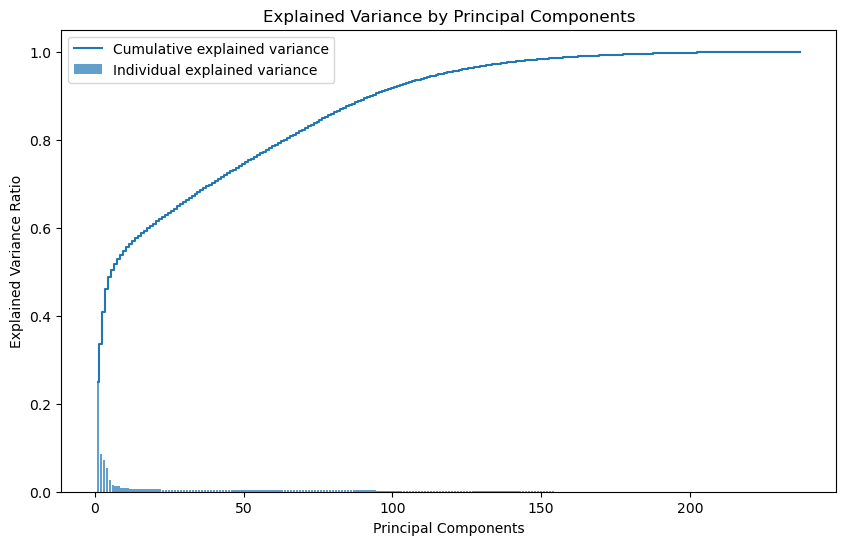

PC1: 0.2488
PC2: 0.3356
PC3: 0.4079
PC4: 0.4611
PC5: 0.4873
PC6: 0.5028
PC7: 0.5167
PC8: 0.5295
PC9: 0.5387
PC10: 0.5478
PC11: 0.5562
PC12: 0.5631
PC13: 0.5696
PC14: 0.5758
PC15: 0.5819
PC16: 0.5877
PC17: 0.5933
PC18: 0.5988
PC19: 0.6042
PC20: 0.6093
PC21: 0.6145
PC22: 0.6195
PC23: 0.6245
PC24: 0.6293
PC25: 0.6341
PC26: 0.6389
PC27: 0.6437
PC28: 0.6483
PC29: 0.6530
PC30: 0.6576
PC31: 0.6622
PC32: 0.6668
PC33: 0.6713
PC34: 0.6758
PC35: 0.6803
PC36: 0.6848
PC37: 0.6893
PC38: 0.6937
PC39: 0.6981
PC40: 0.7025
PC41: 0.7069
PC42: 0.7112
PC43: 0.7155
PC44: 0.7197
PC45: 0.7240
PC46: 0.7281
PC47: 0.7323
PC48: 0.7364
PC49: 0.7406
PC50: 0.7447
PC51: 0.7488
PC52: 0.7528
PC53: 0.7569
PC54: 0.7609
PC55: 0.7649
PC56: 0.7689
PC57: 0.7729
PC58: 0.7768
PC59: 0.7808
PC60: 0.7847
PC61: 0.7887
PC62: 0.7926
PC63: 0.7965
PC64: 0.8003
PC65: 0.8041
PC66: 0.8079
PC67: 0.8117
PC68: 0.8154
PC69: 0.8192
PC70: 0.8229
PC71: 0.8266
PC72: 0.8303
PC73: 0.8339
PC74: 0.8375
PC75: 0.8412
PC76: 0.8448
PC77: 0.8483
PC78: 0.

In [249]:
df_pca_all_2 = create_pca(pca_all_2, england_data2)

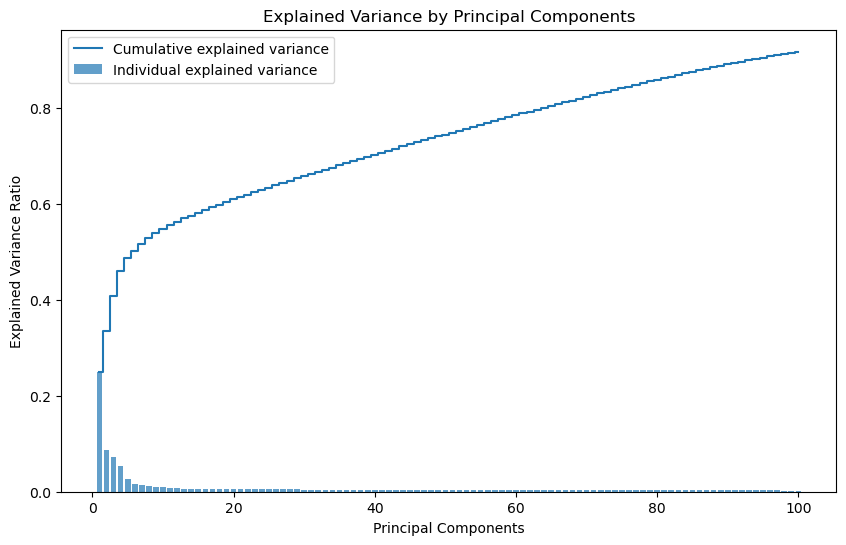

PC1: 0.2488
PC2: 0.3356
PC3: 0.4079
PC4: 0.4611
PC5: 0.4873
PC6: 0.5028
PC7: 0.5167
PC8: 0.5295
PC9: 0.5387
PC10: 0.5478
PC11: 0.5562
PC12: 0.5631
PC13: 0.5696
PC14: 0.5758
PC15: 0.5819
PC16: 0.5877
PC17: 0.5933
PC18: 0.5988
PC19: 0.6042
PC20: 0.6093
PC21: 0.6145
PC22: 0.6195
PC23: 0.6245
PC24: 0.6293
PC25: 0.6341
PC26: 0.6389
PC27: 0.6436
PC28: 0.6483
PC29: 0.6530
PC30: 0.6576
PC31: 0.6622
PC32: 0.6668
PC33: 0.6713
PC34: 0.6758
PC35: 0.6803
PC36: 0.6848
PC37: 0.6893
PC38: 0.6937
PC39: 0.6981
PC40: 0.7025
PC41: 0.7069
PC42: 0.7112
PC43: 0.7155
PC44: 0.7197
PC45: 0.7240
PC46: 0.7281
PC47: 0.7323
PC48: 0.7364
PC49: 0.7405
PC50: 0.7447
PC51: 0.7487
PC52: 0.7528
PC53: 0.7569
PC54: 0.7609
PC55: 0.7649
PC56: 0.7689
PC57: 0.7729
PC58: 0.7768
PC59: 0.7808
PC60: 0.7847
PC61: 0.7886
PC62: 0.7925
PC63: 0.7964
PC64: 0.8003
PC65: 0.8041
PC66: 0.8079
PC67: 0.8117
PC68: 0.8154
PC69: 0.8191
PC70: 0.8228
PC71: 0.8265
PC72: 0.8302
PC73: 0.8339
PC74: 0.8375
PC75: 0.8411
PC76: 0.8447
PC77: 0.8482
PC78: 0.

In [265]:
df_pca_100_2 = create_pca(pca_100_2, england_data2)

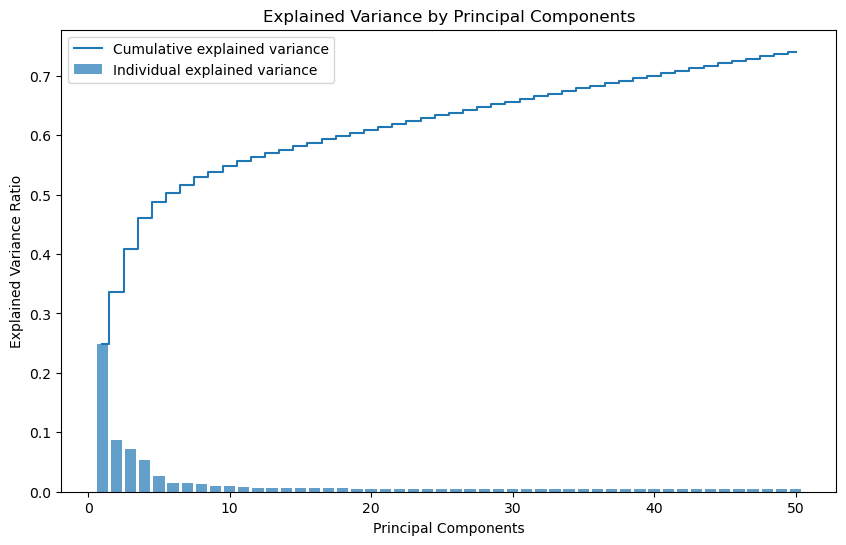

PC1: 0.2488
PC2: 0.3356
PC3: 0.4079
PC4: 0.4611
PC5: 0.4873
PC6: 0.5028
PC7: 0.5167
PC8: 0.5295
PC9: 0.5387
PC10: 0.5478
PC11: 0.5562
PC12: 0.5631
PC13: 0.5696
PC14: 0.5758
PC15: 0.5818
PC16: 0.5876
PC17: 0.5931
PC18: 0.5986
PC19: 0.6039
PC20: 0.6090
PC21: 0.6141
PC22: 0.6191
PC23: 0.6239
PC24: 0.6287
PC25: 0.6334
PC26: 0.6381
PC27: 0.6427
PC28: 0.6473
PC29: 0.6519
PC30: 0.6564
PC31: 0.6609
PC32: 0.6653
PC33: 0.6698
PC34: 0.6742
PC35: 0.6785
PC36: 0.6829
PC37: 0.6872
PC38: 0.6915
PC39: 0.6957
PC40: 0.6999
PC41: 0.7041
PC42: 0.7083
PC43: 0.7124
PC44: 0.7165
PC45: 0.7205
PC46: 0.7245
PC47: 0.7285
PC48: 0.7325
PC49: 0.7364
PC50: 0.7403


In [263]:
df_pca_50_2 = create_pca(pca_50_2, england_data2)

In [267]:
england_data.to_csv('default_data_all_variables',index = False)
england_data2.to_csv('default_data_removed_variables',index = False)
df_pca_50.to_csv('pca_50_data_all_variables',index = False)
df_pca_50_2.to_csv('pca_50_data_removed_variables',index = False)


In [275]:
targets.to_csv('targets.csv',index = False)

In [ ]:
# co dodać

Target ---> wyliczenie prawdopodobieństwa każdego z 1x2 (opcjonalnie porówanie strzelonych bramek) i porównanie z kursasmi/prawdziwymi wynikami?

# oddsy na prawdopodobieństwo --- done
# wartość lineupów /suma wages zawodników?
# średnia zdobywanych/traconych bramek w sezonie(poprzednich)
# pozycja w tabeli >>>>>>>> to samo co punkty
# podania total/dom/wyjazd średnia z ost 5/srednia sezonowa 
# posiadanie piłki dom/wyjazd
# forma dom/wyjazd -- GOTOWE
# brasmki drużyny i przeciwko -- GOTOWE
# xg-- GOTOWE
# strzały ------ ---
# kartki ----------
# h2h drużyny powyższe 
# punkty i forma ostatnich 5 praeciwników --- 